<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('../data/train_kaggle.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [6]:
import seaborn as sns
import plotly as plt

<AxesSubplot:xlabel='Churn', ylabel='Count'>

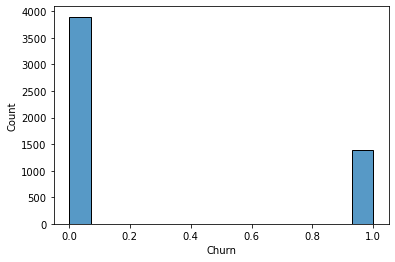

In [7]:
sns.histplot(data[target_col])

<AxesSubplot:ylabel='Count'>

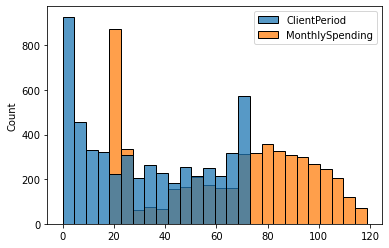

In [8]:
sns.histplot(data[num_cols])

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [9]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [11]:
oneHotEncoder = OneHotEncoder()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.25)

In [13]:
oneHotEncoder.fit_transform(X_train[cat_cols])

<3961x43 sparse matrix of type '<class 'numpy.float64'>'
	with 63376 stored elements in Compressed Sparse Row format>

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [17]:
from catboost import CatBoostClassifier

In [18]:
model = CatBoostClassifier()

In [19]:
grid = {'learning_rate': np.logspace(0.1, 1, 10)}

In [22]:
model.grid_search(param_grid=grid, X=X_train, y=y_train, cv=4)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=3]="Male": Cannot convert 'b'Male'' to float

In [23]:
model = CatBoostClassifier()
model.fit(X_train, y_train, cat_features=cat_cols)

Learning rate set to 0.018544
0:	learn: 0.6818238	total: 79.4ms	remaining: 1m 19s
1:	learn: 0.6699826	total: 89.8ms	remaining: 44.8s
2:	learn: 0.6609662	total: 94.5ms	remaining: 31.4s
3:	learn: 0.6511645	total: 100ms	remaining: 24.9s
4:	learn: 0.6410742	total: 107ms	remaining: 21.3s
5:	learn: 0.6324198	total: 112ms	remaining: 18.6s
6:	learn: 0.6237935	total: 118ms	remaining: 16.8s
7:	learn: 0.6148729	total: 124ms	remaining: 15.4s
8:	learn: 0.6070360	total: 130ms	remaining: 14.3s
9:	learn: 0.5995635	total: 134ms	remaining: 13.3s
10:	learn: 0.5918517	total: 140ms	remaining: 12.6s
11:	learn: 0.5853639	total: 144ms	remaining: 11.9s
12:	learn: 0.5786024	total: 150ms	remaining: 11.4s
13:	learn: 0.5722035	total: 156ms	remaining: 11s
14:	learn: 0.5663345	total: 161ms	remaining: 10.6s
15:	learn: 0.5595097	total: 167ms	remaining: 10.3s
16:	learn: 0.5535537	total: 173ms	remaining: 10s
17:	learn: 0.5479295	total: 179ms	remaining: 9.77s
18:	learn: 0.5424148	total: 186ms	remaining: 9.62s
19:	learn: 

177:	learn: 0.3887407	total: 1.17s	remaining: 5.39s
178:	learn: 0.3885311	total: 1.17s	remaining: 5.38s
179:	learn: 0.3884342	total: 1.18s	remaining: 5.37s
180:	learn: 0.3882952	total: 1.19s	remaining: 5.37s
181:	learn: 0.3881044	total: 1.19s	remaining: 5.36s
182:	learn: 0.3879849	total: 1.2s	remaining: 5.35s
183:	learn: 0.3878574	total: 1.21s	remaining: 5.35s
184:	learn: 0.3876588	total: 1.21s	remaining: 5.34s
185:	learn: 0.3874566	total: 1.22s	remaining: 5.33s
186:	learn: 0.3872684	total: 1.22s	remaining: 5.32s
187:	learn: 0.3871354	total: 1.23s	remaining: 5.31s
188:	learn: 0.3870294	total: 1.24s	remaining: 5.3s
189:	learn: 0.3870069	total: 1.24s	remaining: 5.29s
190:	learn: 0.3868329	total: 1.25s	remaining: 5.28s
191:	learn: 0.3866705	total: 1.25s	remaining: 5.27s
192:	learn: 0.3864429	total: 1.26s	remaining: 5.27s
193:	learn: 0.3861138	total: 1.26s	remaining: 5.26s
194:	learn: 0.3860062	total: 1.27s	remaining: 5.25s
195:	learn: 0.3858609	total: 1.28s	remaining: 5.24s
196:	learn: 0.

345:	learn: 0.3720488	total: 2.11s	remaining: 3.98s
346:	learn: 0.3720488	total: 2.11s	remaining: 3.97s
347:	learn: 0.3719826	total: 2.12s	remaining: 3.97s
348:	learn: 0.3717721	total: 2.13s	remaining: 3.97s
349:	learn: 0.3717630	total: 2.13s	remaining: 3.96s
350:	learn: 0.3716986	total: 2.14s	remaining: 3.95s
351:	learn: 0.3716178	total: 2.14s	remaining: 3.95s
352:	learn: 0.3715209	total: 2.15s	remaining: 3.94s
353:	learn: 0.3714401	total: 2.16s	remaining: 3.94s
354:	learn: 0.3713931	total: 2.16s	remaining: 3.93s
355:	learn: 0.3712159	total: 2.17s	remaining: 3.93s
356:	learn: 0.3712159	total: 2.17s	remaining: 3.92s
357:	learn: 0.3711260	total: 2.18s	remaining: 3.91s
358:	learn: 0.3709438	total: 2.19s	remaining: 3.9s
359:	learn: 0.3707863	total: 2.19s	remaining: 3.9s
360:	learn: 0.3706726	total: 2.2s	remaining: 3.9s
361:	learn: 0.3706179	total: 2.21s	remaining: 3.89s
362:	learn: 0.3705366	total: 2.21s	remaining: 3.88s
363:	learn: 0.3705097	total: 2.22s	remaining: 3.88s
364:	learn: 0.37

506:	learn: 0.3573794	total: 3.09s	remaining: 3s
507:	learn: 0.3572235	total: 3.1s	remaining: 3s
508:	learn: 0.3571672	total: 3.1s	remaining: 2.99s
509:	learn: 0.3570675	total: 3.11s	remaining: 2.99s
510:	learn: 0.3569626	total: 3.12s	remaining: 2.98s
511:	learn: 0.3568871	total: 3.12s	remaining: 2.98s
512:	learn: 0.3567897	total: 3.13s	remaining: 2.97s
513:	learn: 0.3567729	total: 3.13s	remaining: 2.96s
514:	learn: 0.3567025	total: 3.14s	remaining: 2.96s
515:	learn: 0.3565797	total: 3.15s	remaining: 2.95s
516:	learn: 0.3564839	total: 3.15s	remaining: 2.95s
517:	learn: 0.3562895	total: 3.16s	remaining: 2.94s
518:	learn: 0.3562091	total: 3.17s	remaining: 2.94s
519:	learn: 0.3560855	total: 3.17s	remaining: 2.93s
520:	learn: 0.3559679	total: 3.18s	remaining: 2.92s
521:	learn: 0.3559102	total: 3.19s	remaining: 2.92s
522:	learn: 0.3558753	total: 3.19s	remaining: 2.91s
523:	learn: 0.3558393	total: 3.2s	remaining: 2.91s
524:	learn: 0.3557471	total: 3.21s	remaining: 2.9s
525:	learn: 0.3556919	

681:	learn: 0.3400203	total: 4.28s	remaining: 2s
682:	learn: 0.3398277	total: 4.29s	remaining: 1.99s
683:	learn: 0.3397720	total: 4.3s	remaining: 1.99s
684:	learn: 0.3397188	total: 4.31s	remaining: 1.98s
685:	learn: 0.3396487	total: 4.31s	remaining: 1.97s
686:	learn: 0.3395985	total: 4.32s	remaining: 1.97s
687:	learn: 0.3395274	total: 4.33s	remaining: 1.96s
688:	learn: 0.3394224	total: 4.33s	remaining: 1.96s
689:	learn: 0.3394101	total: 4.34s	remaining: 1.95s
690:	learn: 0.3392952	total: 4.34s	remaining: 1.94s
691:	learn: 0.3392798	total: 4.35s	remaining: 1.94s
692:	learn: 0.3391900	total: 4.36s	remaining: 1.93s
693:	learn: 0.3390938	total: 4.37s	remaining: 1.93s
694:	learn: 0.3390741	total: 4.37s	remaining: 1.92s
695:	learn: 0.3390470	total: 4.38s	remaining: 1.91s
696:	learn: 0.3389463	total: 4.38s	remaining: 1.91s
697:	learn: 0.3388602	total: 4.39s	remaining: 1.9s
698:	learn: 0.3387245	total: 4.4s	remaining: 1.89s
699:	learn: 0.3386913	total: 4.4s	remaining: 1.89s
700:	learn: 0.33850

858:	learn: 0.3259787	total: 5.47s	remaining: 898ms
859:	learn: 0.3258747	total: 5.48s	remaining: 891ms
860:	learn: 0.3257559	total: 5.48s	remaining: 885ms
861:	learn: 0.3257123	total: 5.49s	remaining: 879ms
862:	learn: 0.3255617	total: 5.5s	remaining: 873ms
863:	learn: 0.3255011	total: 5.5s	remaining: 866ms
864:	learn: 0.3253732	total: 5.51s	remaining: 860ms
865:	learn: 0.3253293	total: 5.52s	remaining: 854ms
866:	learn: 0.3252775	total: 5.52s	remaining: 847ms
867:	learn: 0.3251948	total: 5.53s	remaining: 841ms
868:	learn: 0.3251373	total: 5.54s	remaining: 835ms
869:	learn: 0.3250840	total: 5.54s	remaining: 829ms
870:	learn: 0.3249490	total: 5.55s	remaining: 822ms
871:	learn: 0.3248584	total: 5.56s	remaining: 816ms
872:	learn: 0.3248219	total: 5.57s	remaining: 810ms
873:	learn: 0.3245567	total: 5.57s	remaining: 803ms
874:	learn: 0.3243991	total: 5.58s	remaining: 797ms
875:	learn: 0.3243721	total: 5.58s	remaining: 791ms
876:	learn: 0.3242619	total: 5.59s	remaining: 784ms
877:	learn: 0.

In [24]:
model.predict(X_test, y_test)

CatBoostError: Invalid prediction_type type=<class 'pandas.core.series.Series'>: must be str().

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.